In [5]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import numpy as np
from math import cos, sin, pi, atan2, sqrt, acos
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import rc
from IPython.display import HTML

In [6]:
from quadruped import DiscreteRippleGait
from quadruped import Leg4

In [18]:
class Sim(object):
    def __init__(self, cmd=[1,1,pi/2]):
        data = {
            # [ length, (limits), offset]
            'coxa':   [52, [-90, 90], 150],
            'femur':  [90, [-100, 100], 150],   # fixme
            'tibia':  [89, [-190, 120], 220],  # fixme
            'tarsus': [90, [-90, 90], 150],

            # gait
            # Angles: 0.00 75.60 -120.39 -45.22
            # 0.00 93.51 -138.68 -44.83
            'stand': [0, 94, -139, -45],  # this determines the neutral leg position
            # 'sit': [0, 90, -90, -90],

            # engine
            # 'serialPort': '/dev/tty.usbserial-A506BOT5'
        }

        leg = Leg4(data)  # 4 servo leg
        gait = DiscreteRippleGait(35.0, leg.getNeutralPos())  # ripple gait

        # cmd = [1,0,0]                             # go straight
#         cmd = [0,0,pi/2]                             # turn
        pts = gait.oneCycle_alt(*cmd)              # array of 3d foot pts
        # print(pts)
        self.angle = leg.generateServoAngles_alt(pts)  # array of leg servo angles

        fig = plt.figure()
        self.fig = fig
        # radial plot 
        self.ax1 = fig.add_subplot(121,projection='polar')
        self.ax1.set_title('Azimuth Angle (x-y plane)')
        # line1, = ax1.plot([], [], lw=2)
        self.line1 = Line2D([], [], color='black')
        self.ax1.add_line(self.line1)
        # ax1.set_aspect('equal', 'datalim')

        # scatter plot
        self.ax2 = fig.add_subplot(122, aspect='equal')
        # line2, = ax2.plot([], [], lw=2)
        self.line2 = Line2D([], [], color='black', linewidth=2)
        self.ax2.set_xlabel('w')
        self.ax2.set_ylabel('z')
        self.ax2.add_line(self.line2)
        self.ax2.set_xlim(-10, 300)
        self.ax2.set_ylim(-100, 150)
        # ax2.set_aspect('equal')
        self.ax2.grid()  # turn grid on
        
    def rplot(self, t1, t2, t3, t4, degrees=True):
        """Given the 4 joint angles (in rads), plot the arm in the x-y and w-z planes

        x = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*cos(t1)
        y = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*sin(t1)
        z = l1*sin(t2) + l2*sin(t2 + t3) + l3*sin(t2 + t3 + t4)
        """
        l1 = 52
        l2 = 89
        l3 = 90
        l4 = 95

        ptsx = [0]
        ptsy = [0]

        if degrees:
            t1 *= pi/180
            t2 *= pi/180
            t3 *= pi/180
            t4 *= pi/180


        # our definition is reverse or these joints
        # link 1
        x0 = l1
        y0 = 0
        ptsx.append(x0)
        ptsy.append(y0)

        # link 2
        x1 = x0 + l2*cos(t2)
        y1 = y0 + l2*sin(t2)
        ptsx.append(x1)
        ptsy.append(y1)

        # link 3
        x2 = x1 + l3*cos(t2 + t3)
        y2 = y1 + l3*sin(t2 + t3)
        ptsx.append(x2)
        ptsy.append(y2)

        # link 4
        x3 = x2 + l4*cos(t2 + t3 + t4)
        y3 = y2 + l4*sin(t2 + t3 + t4)
        ptsx.append(x3)
        ptsy.append(y3)

        self.line1.set_data([0, t1], [0, 1.0])
        self.line2.set_data(ptsx, ptsy)
        return (self.line1, self.line2)
    
    def anim_animate(self, i):
        angles = self.angle[0][i]
        # put back into DH space, note, the offsets aren't all the same
        aa = [a-o for a,o in zip(angles, [150,150,220,150])]
        return self.rplot(*aa)
    
    def run(self):
        return animation.FuncAnimation(self.fig, self.anim_animate, frames=len(self.angle[0]), blit=True)
#         self.anim = anim
#         plt.show()
#         return anim

DH2Servo[1] error 122 > 100
DH2Servo[1] error 118 > 100
DH2Servo[1] error 102 > 100
DH2Servo[1] error 108 > 100
DH2Servo[1] error 111 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 122 > 100
DH2Servo[1] error 111 > 100
DH2Servo[1] error 105 > 100
DH2Servo[1] error 112 > 100
DH2Servo[1] error 104 > 100
DH2Servo[1] error 112 > 100
DH2Servo[1] error 111 > 100
DH2Servo[1] error 108 > 100
DH2Servo[1] error 102 > 100
DH2Servo[1] error 101 > 100
DH2Servo[1] error 113 > 100
DH2Servo[1] error 106 > 100
DH2Servo[1] error 101 > 100


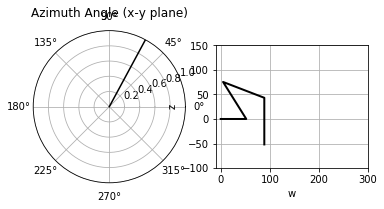

In [19]:
s = Sim()
a = s.run()

In [9]:
# when i call the animation, this will make it work
rc('animation', html='html5')

In [ ]:
s.angle[0]

In [ ]:
from matplotlib.animation import FuncAnimation
class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig = plt.figure()
ax = fig.add_subplot(111)
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)
plt.show()

In [ ]:
def an(cmd):
        data = {
            # [ length, (limits), offset]
            'coxa':   [52, [-90, 90], 150],
            'femur':  [90, [-100, 100], 150],   # fixme
            'tibia':  [89, [-190, 120], 220],  # fixme
            'tarsus': [90, [-90, 90], 150],

            # gait
            # Angles: 0.00 75.60 -120.39 -45.22
            # 0.00 93.51 -138.68 -44.83
            'stand': [0, 94, -139, -45],  # this determines the neutral leg position
            # 'sit': [0, 90, -90, -90],

            # engine
            # 'serialPort': '/dev/tty.usbserial-A506BOT5'
        }

        leg = Leg4(data)  # 4 servo leg
        gait = DiscreteRippleGait(35.0, leg.getNeutralPos())  # ripple gait
        
        pts = gait.oneCycle_alt(*cmd)              # array of 3d foot pts
        # print(pts)
        angle = leg.generateServoAngles_alt(pts)  # array of leg servo angles

        fig = plt.figure()
        
        # radial plot 
        ax1 = fig.add_subplot(121,projection='polar')
        ax1.set_title('Azimuth Angle (x-y plane)')
        # line1, = ax1.plot([], [], lw=2)
        line1 = Line2D([], [], color='black')
        ax1.add_line(line1)
        # ax1.set_aspect('equal', 'datalim')

        # scatter plot
        ax2 = fig.add_subplot(122, aspect='equal')
        # line2, = ax2.plot([], [], lw=2)
        line2 = Line2D([], [], color='black', linewidth=2)
        ax2.set_xlabel('w')
        ax2.set_ylabel('z')
        ax2.add_line(line2)
        ax2.set_xlim(-10, 300)
        ax2.set_ylim(-100, 150)
        # ax2.set_aspect('equal')
        ax2.grid()  # turn grid on
        
        def rplot(t1, t2, t3, t4, degrees=True):
            """Given the 4 joint angles (in rads), plot the arm in the x-y and w-z planes

            x = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*cos(t1)
            y = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*sin(t1)
            z = l1*sin(t2) + l2*sin(t2 + t3) + l3*sin(t2 + t3 + t4)
            """
            l1 = 52
            l2 = 89
            l3 = 90
            l4 = 95

            ptsx = [0]
            ptsy = [0]

            if degrees:
                t1 *= pi/180
                t2 *= pi/180
                t3 *= pi/180
                t4 *= pi/180


            # our definition is reverse or these joints
            # link 1
            x0 = l1
            y0 = 0
            ptsx.append(x0)
            ptsy.append(y0)

            # link 2
            x1 = x0 + l2*cos(t2)
            y1 = y0 + l2*sin(t2)
            ptsx.append(x1)
            ptsy.append(y1)

            # link 3
            x2 = x1 + l3*cos(t2 + t3)
            y2 = y1 + l3*sin(t2 + t3)
            ptsx.append(x2)
            ptsy.append(y2)

            # link 4
            x3 = x2 + l4*cos(t2 + t3 + t4)
            y3 = y2 + l4*sin(t2 + t3 + t4)
            ptsx.append(x3)
            ptsy.append(y3)

            line1.set_data([0, t1], [0, 1.0])
            line2.set_data(ptsx, ptsy)
            return (line1, line2)
    
        def anim_animate(i):
            angles = angle[0][i]
            # put back into DH space, note, the offsets aren't all the same
            aa = [a-o for a,o in zip(angles, [150,150,220,150])]
            return rplot(*aa)
    
        anim = animation.FuncAnimation(fig, anim_animate, frames=len(angle[0]), blit=True)
        anim

In [ ]:
an([1,0,0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
#         return iter(range(self.t.size))
        return range(self.t.size)

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
# ani.save('test_sub.mp4')
plt.show()
ani